In [1]:
import pandas as pd
import numpy as np
import os
from SyntheticControlMethods import Synth
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
os.chdir('C:/Users/hubst/ECON-474/ECON-474/Final Project')

In [2]:
data = pd.read_csv('final_project_combined.csv')

In [3]:
data = data[['Area Name', 'Year', 'Unemployment Rate', 'Female Labor Force Participation Rate', 'African American', 'Hispanic', 
             "Bachelor's or more", 'Manufacturing', 'Agriculture and Mining', 'Immigrant']]
data.head(5)

,Area Name,Year,Unemployment Rate,Female Labor Force Participation Rate,African American,Hispanic,Bachelor's or more,Manufacturing,Agriculture and Mining,Immigrant
0,Idaho,2013,5.59,57.85,0.57,11.43,25.065588,9.87,5.56,5.92
1,Idaho,2019,2.70,57.09,0.69,12.54,27.568047,9.71,5.00,5.96
2,Illinois,2013,6.92,61.32,14.41,16.04,31.443926,12.60,1.05,13.81
3,Illinois,2019,3.87,60.44,14.20,17.12,34.652560,11.99,1.05,14.07
4,Indiana,2013,6.19,59.43,9.10,6.15,23.192024,18.36,1.45,4.73


In [4]:
sc = Synth(data, "Unemployment Rate", "Area Name", "Year", 2019, "Michigan", n_optim = 10, pen = 'auto', random_seed = 100)

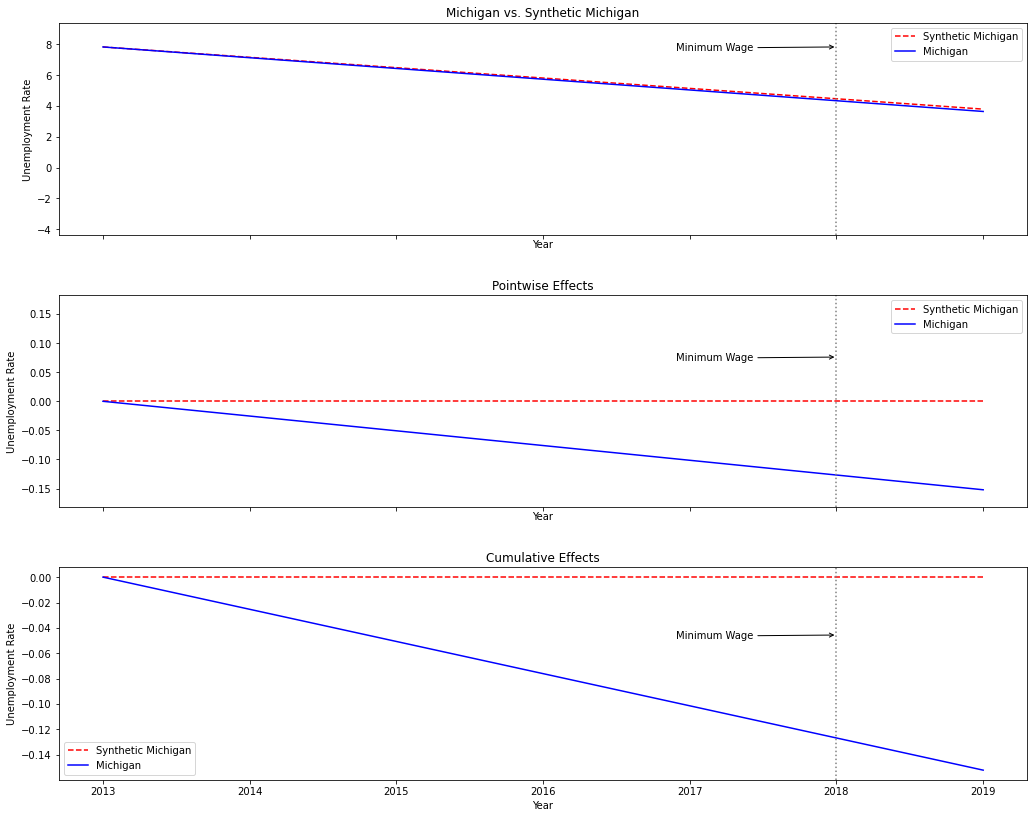

In [5]:
sc.plot(["original", "pointwise", "cumulative"], treated_label = "Michigan", 
            synth_label = "Synthetic Michigan", treatment_label = "Minimum Wage")

In [6]:
sc.original_data.weight_df

,Weight
Nevada,0.758435
New Mexico,0.025967
North Carolina,0.215598


In [7]:
sc.original_data.comparison_df

,Michigan,Synthetic Michigan,WMAPE,Importance
Unemployment Rate,7.84,7.84,0.50,0.28
Female Labor Force Participation Rate,57.86,60.11,2.34,0.03
African American,14.01,10.91,6.30,0.08
Hispanic,4.53,23.45,18.92,0.02
Bachelor's or more,25.93,23.50,3.01,0.23
Manufacturing,16.94,5.97,10.97,0.00
Agriculture and Mining,1.35,1.69,0.34,0.05
Immigrant,6.11,16.39,10.28,0.31


In [8]:
data = data[data['Area Name'] != 'Michigan']

In [9]:
data = data[data['Year'] != 2019]

In [10]:
data.mean(axis = 0)

Year                                     2013.000000
Unemployment Rate                           5.376471
Female Labor Force Participation Rate      60.317059
African American                            7.735882
Hispanic                                   12.957647
Bachelor's or more                         27.265112
Manufacturing                              11.287059
Agriculture and Mining                      2.978235
Immigrant                                   7.974118
dtype: float64

In [11]:
new = sc.original_data.comparison_df
new

,Michigan,Synthetic Michigan,WMAPE,Importance
Unemployment Rate,7.84,7.84,0.50,0.28
Female Labor Force Participation Rate,57.86,60.11,2.34,0.03
African American,14.01,10.91,6.30,0.08
Hispanic,4.53,23.45,18.92,0.02
Bachelor's or more,25.93,23.50,3.01,0.23
Manufacturing,16.94,5.97,10.97,0.00
Agriculture and Mining,1.35,1.69,0.34,0.05
Immigrant,6.11,16.39,10.28,0.31


In [12]:
new.drop(columns = ['WMAPE', 'Importance'], inplace = True)

In [13]:
new

,Michigan,Synthetic Michigan
Unemployment Rate,7.84,7.84
Female Labor Force Participation Rate,57.86,60.11
African American,14.01,10.91
Hispanic,4.53,23.45
Bachelor's or more,25.93,23.50
Manufacturing,16.94,5.97
Agriculture and Mining,1.35,1.69
Immigrant,6.11,16.39


In [14]:
x = [5.38, 60.32, 7.74, 12.96, 27.27, 11.29, 2.98, 7.97]

In [15]:
new['Average of all Control States'] = x

In [16]:
new

,Michigan,Synthetic Michigan,Average of all Control States
Unemployment Rate,7.84,7.84,5.38
Female Labor Force Participation Rate,57.86,60.11,60.32
African American,14.01,10.91,7.74
Hispanic,4.53,23.45,12.96
Bachelor's or more,25.93,23.50,27.27
Manufacturing,16.94,5.97,11.29
Agriculture and Mining,1.35,1.69,2.98
Immigrant,6.11,16.39,7.97


In [17]:
sc.original_data.rmspe_df

,unit,pre_rmspe,post_rmspe,post/pre
0,Michigan,3.609595e-08,0.15202,4.211554e+06


In [18]:
sc.in_space_placebo()

E:\Anaconda\lib\site-packages\SyntheticControlMethods\plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


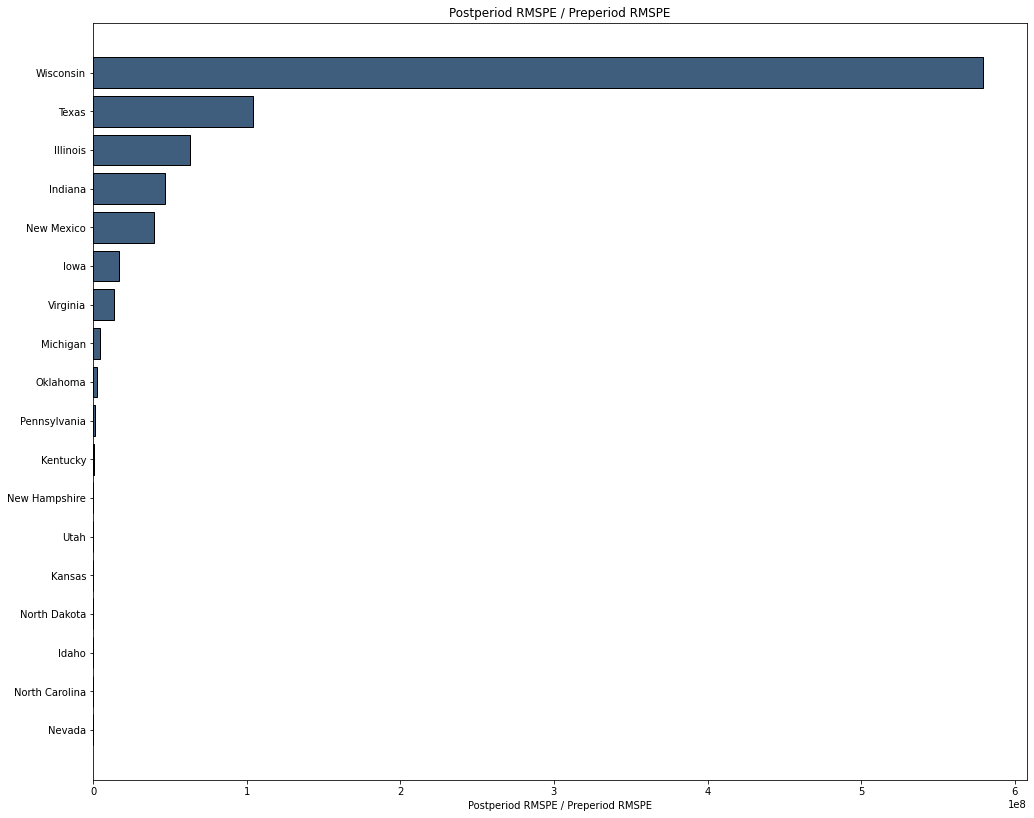

In [19]:
sc.plot(['rmspe ratio'])

E:\Anaconda\lib\site-packages\SyntheticControlMethods\plot.py:197: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


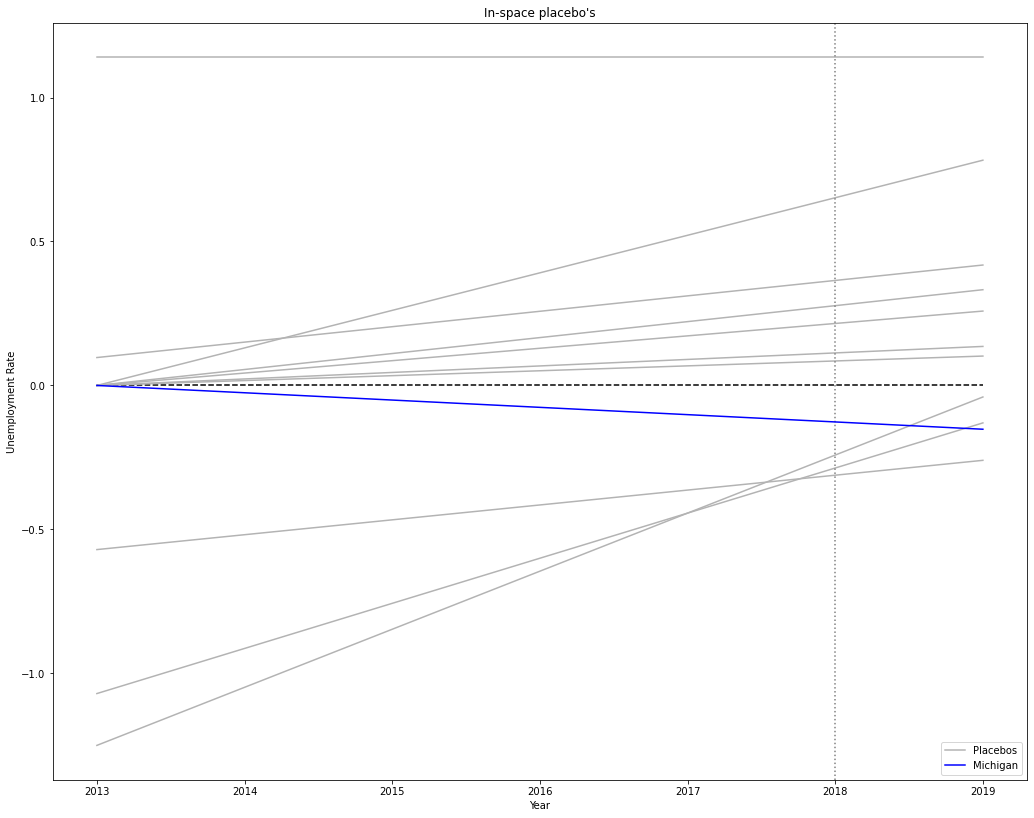

In [20]:
sc.plot(['in-space placebo'], in_space_exclusion_multiple=5, treated_label="Michigan",
            synth_label="Synthetic Michigan")

E:\Anaconda\lib\site-packages\SyntheticControlMethods\plot.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(n_panels, 1, idx)


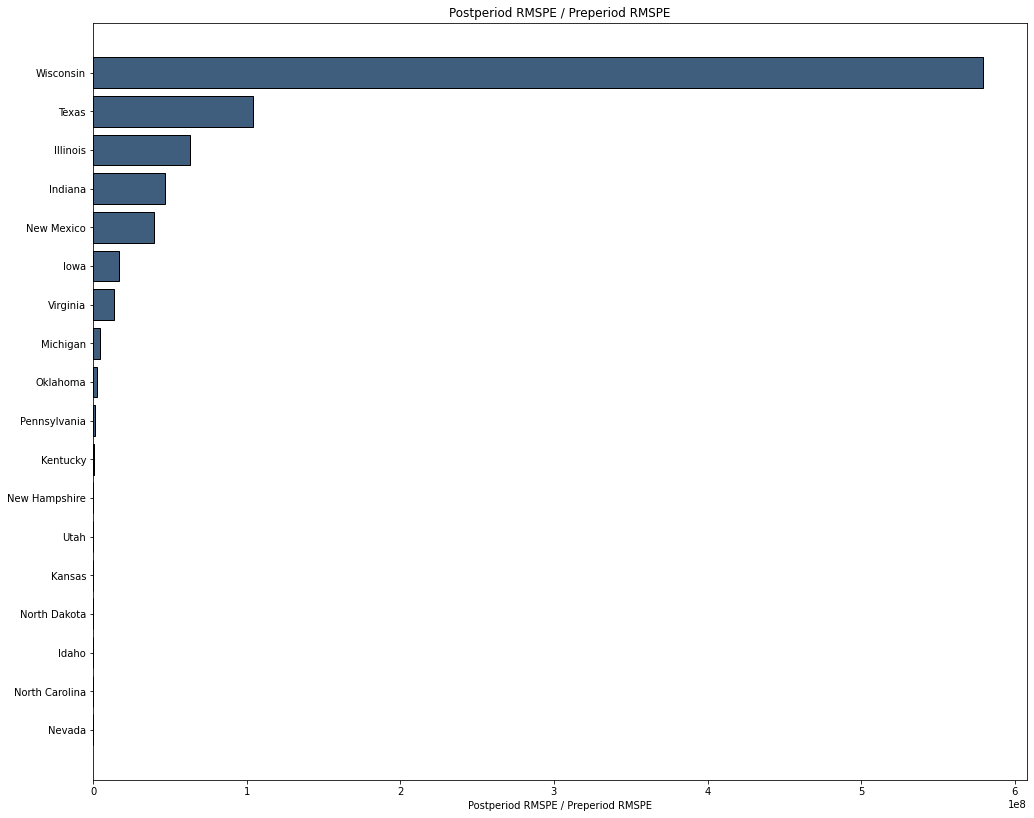

In [21]:
sc.plot(['rmspe ratio'], treated_label="Michigan")

In [52]:
df = pd.read_csv('scMichican.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Area Name                              4 non-null      object 
 1   Minimum Wage Increase                  4 non-null      int64  
 2   Unemployment Rate                      4 non-null      float64
 3   Female Labor Force Participation Rate  4 non-null      float64
 4   African American                       4 non-null      float64
 5   Hispanic                               4 non-null      float64
 6   Bachelor's or more                     4 non-null      float64
 7   Manufacturing                          4 non-null      float64
 8   Agriculture and Mining                 4 non-null      float64
 9   Immigrant                              4 non-null      float64
 10  Year                                   4 non-null      int64  
 11  Area      

In [54]:
df.drop(columns = ['Area', 'Area Name'], inplace = True)

In [55]:
y = df['Unemployment Rate']
x = df.drop(columns = 'Unemployment Rate')

In [56]:
model = LinearRegression().fit(y, x)

ValueError: Expected 2D array, got 1D array instead:
array=[3.65       7.84       7.84000523 3.80202377].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print(model.summary2())